# SARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To avoid seeing warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Reading the Data

In [2]:
df = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [3]:
df['Date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
Date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [5]:
df.set_index(df['Date'],inplace=True)
df.head()

,year,month,decimal_date,average,interpolated,Date
Date,,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71,1958-03-01
1958-04-01,1958,4,1958.292,317.45,317.45,1958-04-01
1958-05-01,1958,5,1958.375,317.50,317.50,1958-05-01
1958-06-01,1958,6,1958.458,NaN,317.10,1958-06-01
1958-07-01,1958,7,1958.542,315.86,315.86,1958-07-01


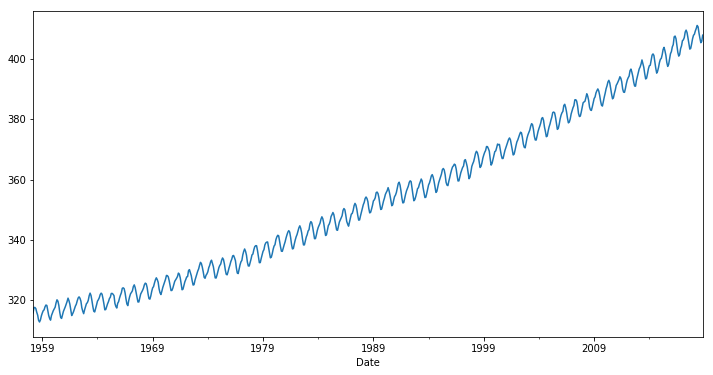

In [6]:
df['interpolated'].plot(figsize=(12,6));

### 2. Error Trend Seasonality Decomposition

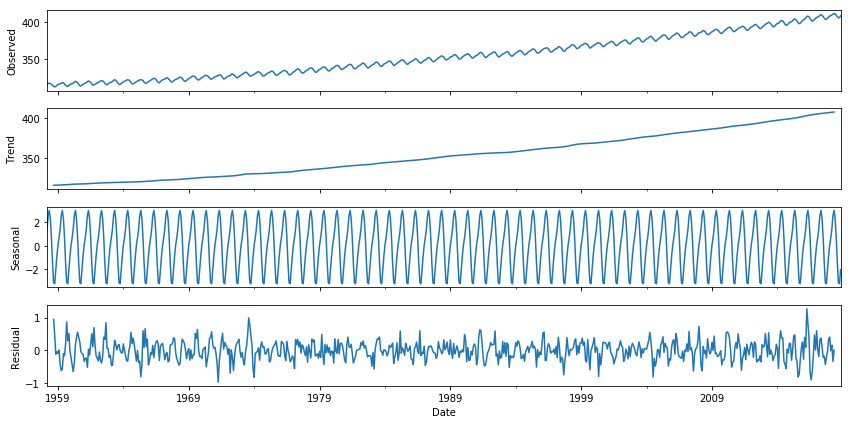

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['interpolated'],model='add')
from pylab import rcParams
rcParams['figure.figsize'] = 12,6
result.plot();

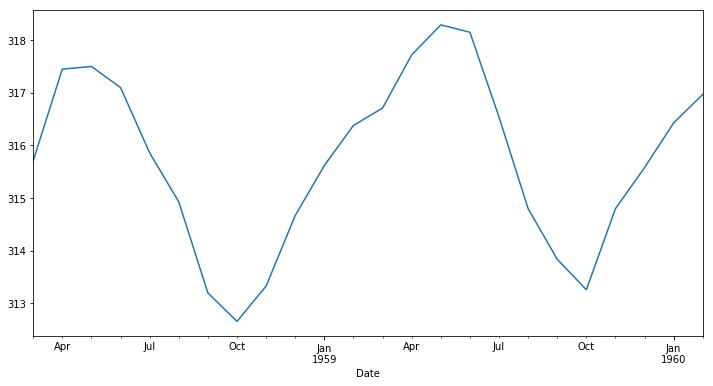

In [8]:
# Yearly Seasonality 
df['interpolated'].iloc[:24].plot();

### 3. Pyramid Arima

In [9]:
# Non Stationary Dataset
from pmdarima import auto_arima
# In this case the dataset has seasonality and m is monthly = 12
stepwise_fit = auto_arima(df['interpolated'],seasonal=True,trace=True,m=12)
print(stepwise_fit)
# Best Model
stepwise_fit.summary()

/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=460.683, BIC=497.406, Fit time=3.736 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2369.532, BIC=2378.713, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=804.125, BIC=822.486, Fit time=1.230 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1614.808, BIC=1633.170, Fit time=0.822 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1101.967, BIC=1134.099, Fit time=3.579 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 12); AIC=459.088, BIC=500.400, Fit time=11.453 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 0, 12); AIC=608.513, BIC=645.236, Fit time=9.790 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


/home/eduardo/.local/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(2, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=759.147, BIC=791.279, Fit time=3.790 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 0, 1, 12); AIC=454.576, BIC=491.298, Fit time=8.240 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 12); AIC=455.519, BIC=487.651, Fit time=6.844 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds


/home/eduardo/.local/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 3) seasonal_order=(2, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 1, 12); AIC=432.082, BIC=459.624, Fit time=9.119 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=424.897, BIC=447.848, Fit time=3.687 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=791.154, BIC=809.516, Fit time=1.319 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=470.299, BIC=497.840, Fit time=8.500 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1935.623, BIC=1949.394, Fit time=0.356 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


/home/eduardo/.local/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(2, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=451.019, BIC=478.561, Fit time=3.849 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=501.791, BIC=520.152, Fit time=2.988 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=438.697, BIC=466.239, Fit time=3.385 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=449.723, BIC=481.855, Fit time=4.657 seconds
Total fit time: 87.458 seconds
ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 0, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -207.448
Date:                            Fri, 03 May 2019   AIC                            424.897
Time:                                    19:00:36   BIC                            447.848
Sample:                                         0   HQIC                           433.753
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.001      0.977      0.328      -0.001       0.002
ma.L1         -0.3805      0.034    -11.243      0.000      -0.447      -0.314
ar.S.L12       0.9996      0.000   3194.350      0.000       0.999       1.000
ma.S.L12      -0.8648      0.021    -40.395      0.000      -0.907      -0.823
sigma2         0.0962      0.005     20.364      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       52.14   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.09   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 4. ACF PACF

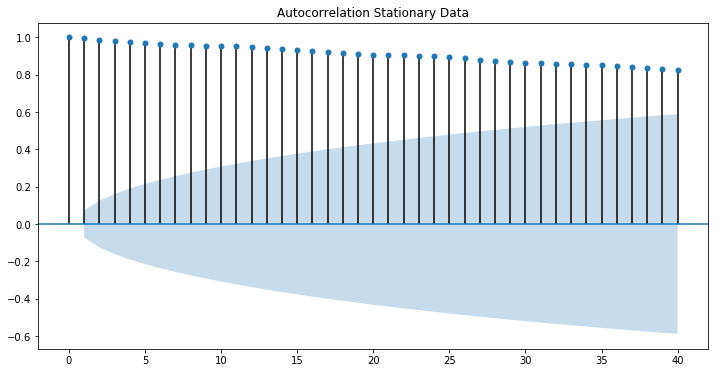

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
# just 40 lags is enough
plot_acf(df['interpolated'],lags=40,title='Autocorrelation Stationary Data');

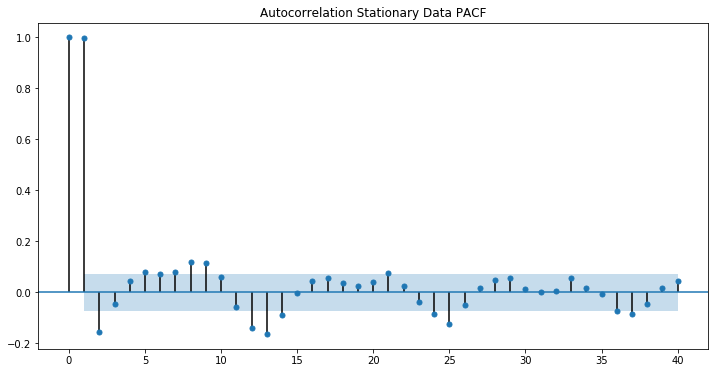

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
# just 40 lags is enough
# shaded region is a 95 percent confidence interval
# Correlation values OUTSIDE of this confidence interval are VERY HIGHLY LIKELY to be a CORRELATION
plot_pacf(df['interpolated'],lags=40,title='Autocorrelation Stationary Data PACF');

### 5. Train Test Split

In [14]:
len(df)

729

In [15]:
train = df.iloc[:717]
test = df.iloc[717:]

### 6. SARIMA Model

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
model = SARIMAX(train['interpolated'],order=(0,1,1),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.162
Date:                            Fri, 03 May 2019   AIC                            418.323
Time:                                    19:17:46   BIC                            436.618
Sample:                                03-01-1958   HQIC                           425.388
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3721      0.034    -10.932      0.000      -0.439      -0.305
ar.S.L12       0.9996      0.000   3025.476      0.000       0.999       1.000
ma.S.L12      -0.8641      0.023    -37.492      0.000      -0.909      -0.819
sigma2         0.0962      0.005     20.176      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       52.26   Jarque-Bera (JB):                 3.73
Prob(Q):                              0.09   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.03
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 7. Predictions

In [18]:
start = len(train)
end = len(train) + len(test) - 1
# typ= 'levels' to return the differenced values to the original units
preds = results.predict(start=start,end=end,typ='levels').rename('SARIMA (p,d,q)(P,D,Q,m) Predictions')

### 8. Plotting

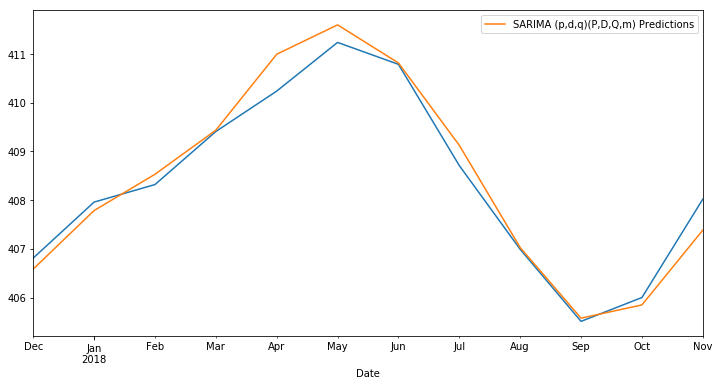

In [19]:
test['interpolated'].plot(figsize=(12,6))
preds.plot(legend=True);

### 9. Evaluate the Model

In [21]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['interpolated'],preds) # Compare it with test.mean()
error

0.3461646888860452

In [22]:
test['interpolated'].mean()

408.3333333333333

___Pretty Good!!!___

### 10. Forecast for Future Data

/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


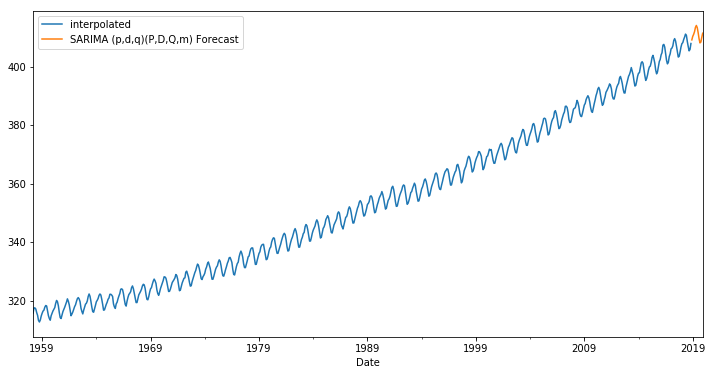

In [25]:
# Refit with all the Data
model = SARIMAX(df['interpolated'],order=(0,1,1),seasonal_order=(1, 0, 1, 12)) # Order is chosen from Pyramid ARIMA
results = model.fit()
results.summary()
# Forecasting
start = len(df)
end = len(df) + 12
# typ= 'levels' to return the differenced values to the original units
forecasted_values = results.predict(start=start,end=end,typ='levels').rename('SARIMA (p,d,q)(P,D,Q,m) Forecast')
# Plotting
df['interpolated'].plot(figsize=(12,6),legend=True)
forecasted_values.plot(legend=True);